### 0: Importing libraries and datasets

In [1]:
### Libraries
import numpy as np
import pandas as pd
import scipy as sp
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Datasets
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
# print("shape: of matrix: ", train_data.shape, "\n", train_data.head())
# print(train_data.isna().sum()) #Check if we have any missing values

### 1: Hypothesis Generation

We need to come up with some shit here

### 2: Visualizing The Data

Feel free to add more graphs

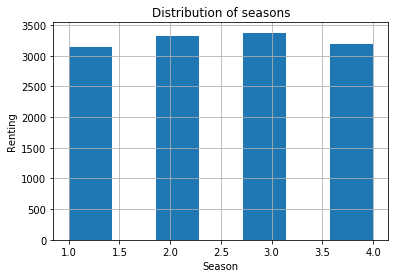

In [3]:
## Seasons
plt.title('Distribution of seasons')
plt.xlabel('Season')
plt.ylabel('Renting')
train_data['season'].hist(bins=7) #I put 8 bins to have a nice spacing between each season
plt.show()
## Seems like 2 and 3 (summer and fall) are the most popular seasons

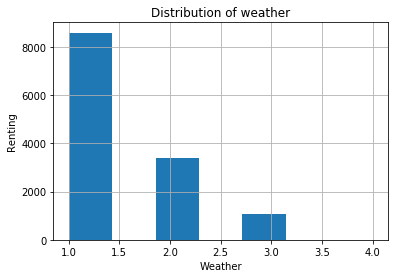

In [4]:
## Weather
plt.title('Distribution of weather')
plt.xlabel('Weather')
plt.ylabel('Renting')
train_data['weathersit'].hist(bins=7) #I put 8 bins to have a nice spacing between each season
plt.show()
## Seems like Clear weather is by far superior

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


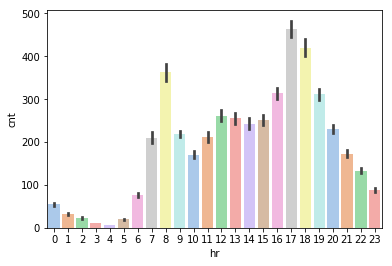

In [5]:
## Hourly
x = train_data['hr']
y = train_data['cnt']
sns.barplot(x=x, y=y, palette='pastel')
plt.show()
## Around 8h00 and 17h00 - 18h00 it's peak moment

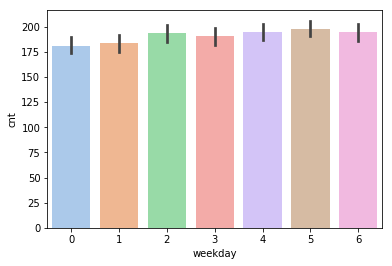

In [6]:
## Daily
x = train_data['weekday']
y = train_data['cnt']
sns.barplot(x=x, y=y, palette='pastel')
plt.show()
## Amount of bikes rented is pretty consistent per day

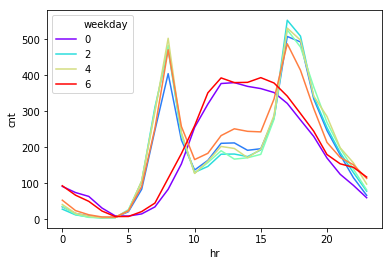

In [7]:
## Rentals Per hour Per day
daily_rentals = pd.DataFrame(train_data.groupby(['hr', 'weekday'], sort = True)['cnt'].mean()).reset_index()
x = daily_rentals['hr']
y = daily_rentals['cnt']
h = daily_rentals['weekday']
sns_plt = sns.lineplot(x=x, y=y, hue = h, data = daily_rentals, palette='rainbow')
## 0 and 6 are Sunday and Saturday respectively. This plot shows the difference in rental behavior during workdays and weekends
plt.show()

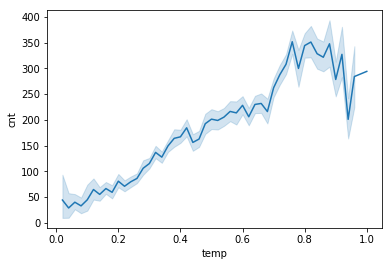

In [8]:
## Rentals with respect to temperature
## Temperature is normalized between 0 and 1
x = train_data['temp']
y = train_data['cnt']
sns.lineplot(x=x, y=y, data=train_data)
plt.show()
## Shows that around temp=0.68 there is a huge increase in rentals

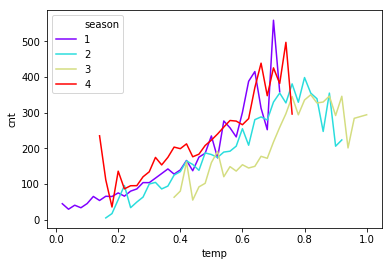

In [9]:
## Plot of amount of rentals with respect to the temperature PER season
daily_rentals = pd.DataFrame(train_data.groupby(['temp', 'season'], sort = True)['cnt'].mean()).reset_index()
x = daily_rentals['temp']
y = daily_rentals['cnt']
h = daily_rentals['season']
sns_plt = sns.lineplot(x=x, y=y, hue = h, data = daily_rentals, palette='rainbow')
plt.show()
## Not sure if this one is useful

### 3: Hypothesis Testing

Well first we'd need some Hypothesis

### 4: Model Building 

This is where the magic happens

**Linear Regression**

In [10]:
### Linear Regression
output_data = train_data.loc[:, 'cnt']
input_data = train_data.drop(['cnt'], axis=1)
print("y data: ", output_data.shape)
print("x data: ", input_data.shape)

lin_reg = LinearRegression().fit(input_data, output_data)
prediction = lin_reg.predict(test_data)
print("prediction", prediction.shape)

y data:  (13035,)
x data:  (13035, 11)
prediction (4344,)


In [11]:
### Setting up the output doc
id_column = [x for x in range(1, 4345)]
cnt_column = ['cnt']
prediction_df = pd.DataFrame(index=id_column, columns=cnt_column)
prediction_df.columns.name = 'Id'
prediction_df['cnt'] = [int(pred) for pred in prediction]

# to make sure each value is 0 or higher
prediction_df = prediction_df.clip(lower = 0)

print("prediction df")
print(prediction_df.head())

prediction df
Id  cnt
1    69
2    77
3   187
4   133
5   258


**Random Decision Forest**

In [12]:
### Random Decision Forest
forest_reg = RandomForestRegressor(max_depth=17, max_features=0.9, min_samples_split=4, n_estimators=250, n_jobs=-1,
           oob_score=True, random_state=42, warm_start=True)

forest_reg.fit(input_data, output_data)
forest_pred = forest_reg.predict(test_data)
print("random forest: ", forest_pred.shape)

random forest:  (4344,)


In [13]:
### Setting up the output doc
id_column = [x for x in range(1, 4345)]
cnt_column = ['cnt']
forest_df = pd.DataFrame(index=id_column, columns=cnt_column)
forest_df.columns.name = 'Id'
forest_df['cnt'] = [int(pred) for pred in forest_pred]

# to make sure each value is 0 or higher
forest_df = forest_df.clip(lower = 0)

print("random forest df")
print(forest_df.head())

random forest df
Id  cnt
1     4
2   201
3   173
4    38
5   112


**Gradient Boosting Regressor**

In [14]:
### Gradient Boosting
input_data = input_data.drop(['atemp'], axis=1)
test_data = test_data.drop(['atemp'], axis=1)
grad_boost = GradientBoostingRegressor(n_estimators=12000,alpha=0.01, max_features=6, warm_start=True)

grad_boost.fit(input_data, output_data)
grad_pred = grad_boost.predict(test_data)
print("Gradient Boosting Regressor: ", grad_pred.shape)

Gradient Boosting Regressor:  (4344,)


In [16]:
### Output to the document 
id_column = [x for x in range(1, 4345)]
cnt_column = ['cnt']
gradient_df = pd.DataFrame(index=id_column, columns=cnt_column)
gradient_df.columns.name = 'Id'
gradient_df['cnt'] = [int(pred) for pred in grad_pred]

# to make sure each value is 0 or higher
gradient_df = gradient_df.clip(lower = 0)

print("Gradient boosting: ")
print(gradient_df.head())

Gradient boosting: 
Id  cnt
1    16
2   169
3   252
4    13
5   114


Gradient Boosting Regressor gives us the best result so far, but the random forest method with it's given tune comes very close. 

With this in mind, I try to create an output that contains the best of both classifiers. For this I make the following assumption (Note that this assumption might actually be wrong)

- The Random Forest Regressor works well for the lower bound
- The Gradient Boosting Regressor works well for the upper bound



Since the Gradient Boosting Regressor gives us the best overall results, we will take these results as our basis. When we notice that there is a big difference between both the Forest Regressor and the Boosting Regressor, we will adjust the results to either increase or decrease, depending on if it's happening on the lower bound or upper bound of our estimations. 
For the results in the middle, we take the average of both our classifiers. 

**Combined Results**

In [17]:
### Setting up everything for the combined results
result_df = pd.DataFrame(index=id_column, columns=cnt_column)
# result_df['cnt'] = [int(pred) for pred in grad_pred]
result_df = result_df.clip(lower = 0)
result_df.columns.name = 'Id'
result_pred = grad_pred

fresh = []

In [18]:
### Filling the list with the combined results
for i in range (len(grad_pred)):
    if grad_pred[i]/(grad_pred[i]+forest_pred[i]) > 0.2 and grad_pred[i]/(grad_pred[i]+forest_pred[i]) < 0.8:
        fresh.append((grad_pred[i]+forest_pred[i])/2)
    elif grad_pred[i]/(grad_pred[i]+forest_pred[i]) > 0.8:
        fresh.append((grad_pred[i] + forest_pred[i])/2.4)
    elif grad_pred[i]/(grad_pred[i]+forest_pred[i]) < 0.2:
        fresh.append((grad_pred[i] + forest_pred[i]) / 1.6)
    else:
        fresh.append(grad_pred[i])

In [19]:
print("length of results is: ", len(fresh))
result_df['cnt'] = [int(f) for f in fresh]

# to make sure each value is 0 or higher
result_df = result_df.clip(lower = 0)

print("Combined results:")
print(result_df.head())

length of results is:  4344
Combined results:
Id  cnt
1    10
2   185
3   212
4    26
5   113
